In [323]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [324]:
notebook_path = os.path.abspath("SpaceshipTitanic.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\train.csv")
train = pd.read_csv(path)

In [325]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [326]:
y = train['Transported']
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [327]:
x = train.drop('Transported',axis=1)
x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


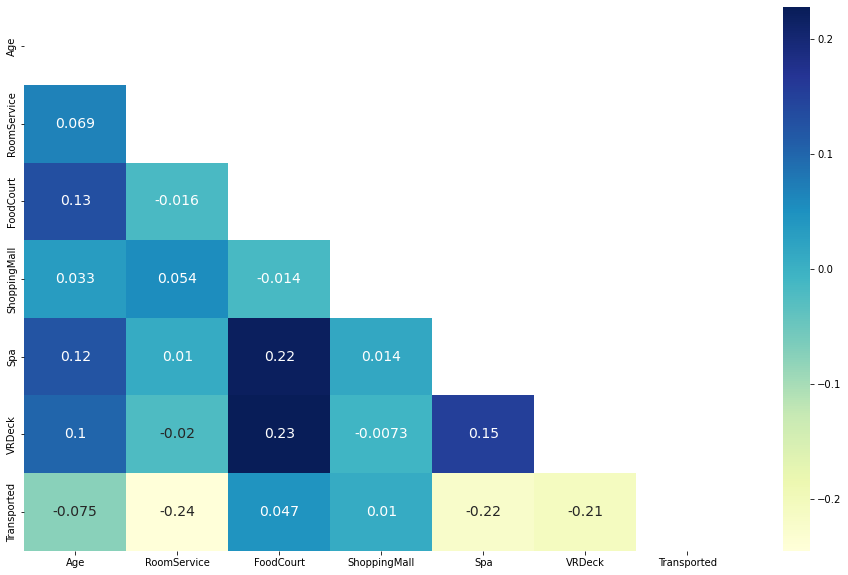

In [328]:
mask = np.zeros_like(train.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [329]:
x.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [330]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


In [331]:
x.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [332]:
x['HomePlanet'].fillna(x['HomePlanet'].mode()[0], inplace=True)
x['Destination'].fillna(x['Destination'].mode()[0], inplace=True)
x['CryoSleep'].fillna(x['CryoSleep'].mode()[0], inplace=True)
x['Cabin'].fillna('X/-1/X', inplace=True)
x['Age'].fillna(x['Age'].mean(),inplace=True)
x['VIP'].fillna(x['VIP'].mode()[0],inplace=True)
x['RoomService'].fillna(0,inplace=True)
x['FoodCourt'].fillna(0,inplace=True)
x['ShoppingMall'].fillna(0,inplace=True)
x['Spa'].fillna(0,inplace=True)
x['VRDeck'].fillna(0,inplace=True)
x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [333]:
x['GroupId'] = x['PassengerId'].str[0:4].astype(int)
x.drop('PassengerId',axis=1,inplace=True)
x

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280


In [334]:
Cabin = x['Cabin'].str.split('/')
Cabin
x['Deck'] = Cabin.str[0]
x['CabinNum'] = Cabin.str[1].astype(int)
x['Side'] = Cabin.str[2]
x.drop('Cabin',axis=1,inplace=True)
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [335]:
leD = preprocessing.LabelEncoder()
leD.fit(x['Destination'])
leD.classes_

array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)

In [336]:
x['Destination'] = leD.transform(x['Destination'])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,Europa,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,Earth,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,Europa,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,Europa,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,Earth,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,Earth,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,Earth,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,Europa,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [337]:
leH = preprocessing.LabelEncoder()
leH.fit(x['HomePlanet'])
leH.classes_

array(['Earth', 'Europa', 'Mars'], dtype=object)

In [338]:
x['HomePlanet'] = leH.transform(x['HomePlanet'])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [339]:
x['CryoSleep'].replace({False: 0, True: 1}, inplace=True)
x['VIP'].replace({False: 0, True: 1}, inplace=True)
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [340]:
sideMode = x['Side'].mode()
x['Side'] = x['Side'].str.replace('X', sideMode[0])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [341]:
deckMode = x['Deck'].mode()
x['Deck'] = x['Deck'].str.replace('X', deckMode[0])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,S
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,S
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,S
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,P
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,S
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,S
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,S


In [342]:
leSide = preprocessing.LabelEncoder()
leSide.fit(x['Side'])
leSide.classes_

array(['P', 'S'], dtype=object)

In [343]:
x['Side'] = leSide.transform(x['Side'])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,F,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,A,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,A,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,F,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,A,98,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,G,1499,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,G,1500,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,E,608,1


In [344]:
leDeck = preprocessing.LabelEncoder()
leDeck.fit(x['Deck'])
leDeck.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [345]:
x['Deck'] = leDeck.transform(x['Deck'])
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,0,98,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,6,1499,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,6,1500,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,4,608,1


In [346]:
decks = list(x['Deck'].unique())
for d in decks :
    cabinnum_to_impute = x.groupby('Deck')['CabinNum'].median()[decks.index(d)]
    x.loc[(x['CabinNum']==-1) & (x['Deck'] == d), 'CabinNum'] = cabinnum_to_impute
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,0,98.0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,6,1499.0,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,6,1500.0,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,4,608.0,1


In [347]:
x.drop('Name',axis=1,inplace=True)
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,2,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,3,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,4,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,9276,0,98.0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,9278,6,1499.0,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,9279,6,1500.0,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,9280,4,608.0,1


In [348]:
x['Age_bin'] = pd.cut(x['Age'], bins=[-1,19,27,38,80], labels=[0,1,2,3])
x.drop(['Age'],axis=1,inplace=True)
x

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side,Age_bin
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0,3
1,0,0,2,0,109.0,9.0,25.0,549.0,44.0,2,5,0.0,1,1
2,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,3,0,0.0,1,3
3,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,3,0,0.0,1,2
4,0,0,2,0,303.0,70.0,151.0,565.0,2.0,4,5,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,1,0.0,6819.0,0.0,1643.0,74.0,9276,0,98.0,0,3
8689,0,1,1,0,0.0,0.0,0.0,0.0,0.0,9278,6,1499.0,1,0
8690,0,0,2,0,0.0,0.0,1872.0,1.0,0.0,9279,6,1500.0,1,1
8691,1,0,0,0,0.0,1049.0,0.0,353.0,3235.0,9280,4,608.0,1,2


In [349]:
x.describe()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.649833,0.349362,1.494306,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,4633.389624,4.321293,590.424134,0.516162
std,0.795183,0.476796,0.814966,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2671.028856,1.760826,510.127676,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,3.000000,166.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,5.000000,407.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6883.000000,6.000000,983.000000,1.000000
max,2.000000,1.000000,2.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,7.000000,1894.000000,1.000000


In [350]:
x['Age_bin']=x['Age_bin'].astype(int)

In [351]:
x.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
GroupId         0
Deck            0
CabinNum        0
Side            0
Age_bin         0
dtype: int64

In [352]:
logreg = LogisticRegression(C=0.05,solver='lbfgs',max_iter=1000,penalty='l2')
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
score.mean()

0.7805135816716747

In [353]:
randomForest = RandomForestClassifier(n_estimators=100, max_depth=20)
kf=KFold(n_splits=5)
score=cross_val_score(randomForest,x,y,cv=kf)
score.mean()

0.7913271717473173

In [354]:
ada = AdaBoostClassifier()
score=cross_val_score(ada,x,y,cv=kf)
score.mean()

0.7900632679787003

In [355]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(x,y)
xgb.score(x,y)

0.922121246980329

In [356]:
gb = GradientBoostingClassifier()
score=cross_val_score(gb,x,y,cv=kf)
score.mean()

0.7957004773056483

In [357]:
models = [LogisticRegression(C=0.05,solver='lbfgs',max_iter=1000,penalty='l2'), RandomForestClassifier(n_estimators=100), AdaBoostClassifier(), XGBClassifier(eval_metric='mlogloss'),GradientBoostingClassifier()]

In [358]:
notebook_path = os.path.abspath("SpaceshipTitanic.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\test.csv")
test = pd.read_csv(path)

In [359]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [360]:
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
test['Cabin'].fillna('X/-1/X', inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0],inplace=True)
test['RoomService'].fillna(0,inplace=True)
test['FoodCourt'].fillna(0,inplace=True)
test['ShoppingMall'].fillna(0,inplace=True)
test['Spa'].fillna(0,inplace=True)
test['VRDeck'].fillna(0,inplace=True)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,X/-1/X,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [361]:
test['GroupId'] = test['PassengerId'].str[0:4].astype(int)
PassengerId = test['PassengerId']
test.drop('PassengerId',axis=1,inplace=True)
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId
0,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13
1,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18
2,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19
3,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21
4,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266
4273,Earth,False,X/-1/X,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269
4274,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271
4275,Europa,False,D/297/P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273


In [362]:
Cabin = test['Cabin'].str.split('/')
Cabin
test['Deck'] = Cabin.str[0]
test['CabinNum'] = Cabin.str[1].astype(int)
test['Side'] = Cabin.str[2]
test.drop('Cabin',axis=1,inplace=True)
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,X,-1,X
4274,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [363]:
leD = preprocessing.LabelEncoder()
leD.fit(test['Destination'])
leD.classes_

array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)

In [364]:
test['Destination'] = leD.transform(test['Destination'])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,Earth,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,Earth,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,Europa,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,Europa,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,Earth,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,Earth,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,X,-1,X
4274,Mars,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,Europa,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [365]:
leH = preprocessing.LabelEncoder()
leH.fit(test['HomePlanet'])
leH.classes_

array(['Earth', 'Europa', 'Mars'], dtype=object)

In [366]:
test['HomePlanet'] = leH.transform(test['HomePlanet'])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,X,-1,X
4274,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [367]:
test['CryoSleep'].replace({False: 0, True: 1}, inplace=True)
test['VIP'].replace({False: 0, True: 1}, inplace=True)
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,X,-1,X
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [368]:
sideMode = test['Side'].mode()
test['Side'] = test['Side'].str.replace('X', sideMode[0])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,X,-1,S
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [369]:
deckMode = test['Deck'].mode()
test['Deck'] = test['Deck'].str.replace('X', deckMode[0])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,S
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,S
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,S
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,S
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,S
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,F,-1,S
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,P
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,P


In [370]:
leSide = preprocessing.LabelEncoder()
leSide.fit(test['Side'])
leSide.classes_

array(['P', 'S'], dtype=object)

In [371]:
test['Side'] = leSide.transform(test['Side'])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,3,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,4,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,0,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,1,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,G,1496,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,F,-1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,D,296,0
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,D,297,0


In [372]:
leDeck = preprocessing.LabelEncoder()
leDeck.fit(test['Deck'])
leDeck.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [373]:
test['Deck'] = leDeck.transform(test['Deck'])
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,6,3,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,5,4,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,2,0,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,2,1,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,6,1496,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,5,-1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,3,296,0
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,3,297,0


In [374]:
test.drop('Name',axis=1,inplace=True)
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,13,6,3,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,18,5,4,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,19,2,0,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,21,2,1,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,23,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,9266,6,1496,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,9269,5,-1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,9271,3,296,0
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,9273,3,297,0


In [375]:
decks = list(test['Deck'].unique())
for d in decks :
    cabinnum_to_impute = test.groupby('Deck')['CabinNum'].median()[decks.index(d)]
    test.loc[(test['CabinNum']==-1) & (test['Deck'] == d), 'CabinNum'] = cabinnum_to_impute
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,13,6,3.0,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,18,5,4.0,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,19,2,0.0,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,21,2,1.0,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,23,5,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,9266,6,1496.0,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,9269,5,157.0,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,9271,3,296.0,0
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,9273,3,297.0,0


In [376]:
test.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.666823,0.361001,1.516016,28.658146,0.017302,215.062427,428.592238,173.233107,295.895955,304.898293,4639.296469,4.368716,599.583119,0.512743
std,0.809240,0.480347,0.801973,14.027384,0.130409,601.914503,1510.155974,554.991776,1104.872018,1235.991811,2716.197368,1.702467,513.498669,0.499896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2249.000000,4.000000,162.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4639.000000,5.000000,416.000000,1.000000
75%,1.000000,1.000000,2.000000,37.000000,0.000000,48.000000,66.000000,27.000000,43.000000,31.000000,7030.000000,6.000000,1012.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,9277.000000,7.000000,1890.000000,1.000000


In [377]:
test['Age_bin'] = pd.cut(test['Age'], bins=[-1,19,27,38,80], labels=[0,1,2,3])
test.drop(['Age'],axis=1,inplace=True)
test

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,Deck,CabinNum,Side,Age_bin
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,13,6,3.0,1,1
1,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,18,5,4.0,1,0
2,1,1,0,0,0.0,0.0,0.0,0.0,0.0,19,2,0.0,1,2
3,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,21,2,1.0,1,2
4,0,0,2,0,10.0,0.0,635.0,0.0,0.0,23,5,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,0,0.0,0.0,0.0,0.0,0.0,9266,6,1496.0,1,2
4273,0,0,2,0,0.0,847.0,17.0,10.0,144.0,9269,5,157.0,1,3
4274,2,1,0,0,0.0,0.0,0.0,0.0,0.0,9271,3,296.0,0,2
4275,1,0,2,0,0.0,2680.0,0.0,0.0,523.0,9273,3,297.0,0,2


In [378]:
test['Age_bin']=test['Age_bin'].astype(int)

In [379]:
val = [0]*len(test)
for model in models :
    model.fit(x,y)
    pred = model.predict(test)
    for i in range(len(pred)) :
        if pred[i] == True :
            val[i] += 1
        else :
            val[i] -= 1
val

[3,
 -5,
 5,
 5,
 1,
 -3,
 5,
 5,
 5,
 3,
 -5,
 -5,
 3,
 3,
 -5,
 -5,
 -5,
 5,
 5,
 -5,
 1,
 -5,
 5,
 5,
 1,
 -5,
 5,
 5,
 -3,
 5,
 5,
 -5,
 5,
 -5,
 -5,
 -5,
 5,
 1,
 3,
 -5,
 1,
 -1,
 1,
 1,
 -5,
 3,
 -5,
 -5,
 -1,
 -5,
 5,
 5,
 -5,
 5,
 1,
 5,
 -5,
 5,
 5,
 -5,
 5,
 3,
 -5,
 5,
 5,
 -5,
 5,
 -5,
 1,
 -5,
 -5,
 3,
 -5,
 -5,
 5,
 3,
 5,
 5,
 -1,
 5,
 5,
 1,
 -5,
 -5,
 3,
 5,
 5,
 -5,
 5,
 5,
 -5,
 -5,
 -5,
 -5,
 -5,
 -5,
 5,
 -5,
 5,
 -5,
 5,
 5,
 5,
 -5,
 5,
 -5,
 3,
 5,
 -5,
 5,
 5,
 -5,
 5,
 5,
 -5,
 5,
 5,
 -5,
 -5,
 -5,
 -5,
 -5,
 -5,
 -5,
 5,
 5,
 -5,
 -5,
 5,
 -5,
 5,
 -3,
 -3,
 5,
 -5,
 5,
 -3,
 -5,
 -5,
 -5,
 3,
 1,
 5,
 -5,
 3,
 -5,
 5,
 3,
 -1,
 3,
 5,
 1,
 1,
 -5,
 -5,
 -1,
 5,
 5,
 -5,
 -5,
 -5,
 1,
 3,
 5,
 -5,
 -5,
 5,
 -5,
 5,
 -5,
 -5,
 5,
 3,
 5,
 -1,
 5,
 -3,
 -1,
 3,
 1,
 -5,
 5,
 -5,
 -5,
 -5,
 -5,
 1,
 -5,
 5,
 1,
 5,
 5,
 -5,
 -5,
 -5,
 -5,
 -3,
 5,
 3,
 -5,
 5,
 -5,
 -5,
 -5,
 -3,
 1,
 -5,
 5,
 -3,
 5,
 5,
 5,
 5,
 5,
 -5,
 -5,
 -5,
 5,
 5,
 5,
 1,
 5,
 1,
 5,


In [380]:
pred = ['False']*len(val)
for i in range(len(val)) :
    if val[i] > 0 :
        pred[i] = 'True'
pred

['True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',


In [381]:
ans = pd.DataFrame()
ans['PassengerId'] = PassengerId
ans['Transported'] = pred
ans

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [382]:
ans.to_csv('submission.csv', encoding='utf-8', index=False)